Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

In [ ]:
!pip install -q tensorflow-datasets tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow_datasets as tfds

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:


# Construct a tf.data.Dataset
valid_set, train_set, test_set = tfds.load(
    'deep_weeds', 
    as_supervised = 'true',
    split=[ [f'train[{k}%:{k+10}%]' for k in range(0, 40,10)], [f'train[:{k}%]+train[{k+10}%:40%]' for k in range(0, 40, 10)], 'train[40%:50%]'], #Half dataset
    #split=[ [f'train[{k}%:{k+10}%]' for k in range(0, 80, 10)], [f'train[:{k}%]+train[{k+10}%:80%]' for k in range(0, 80, 10)], 'train[80%:]']   #Full dataset
    )

print("Train set size: ", len(train_set)) # Number of folds:  4 (80%) half of dataset -> (40%) out of total dataset
print("Train set size: ", len(train_set[0])) # Train set size K=0:  5253 
print("Train set size: ", len(train_set[1])) # Train set size K=1:  5253 
print("Train set size: ", len(train_set[2])) # Train set size K=2:  5253 
print("Train set size: ", len(train_set[3])) # Train set size K=3:  5253 
 
print("Valid set size: ", len(valid_set)) # Number of folds:  4 (10%) half of dataset -> (5%)  out of total dataset
print("Train set size: ", len(valid_set[0])) # Train set size K=0:  1751 (5%)
print("Train set size: ", len(valid_set[1])) # Train set size K=1:  1751 (5%)
print("Train set size: ", len(valid_set[2])) # Train set size K=2: 1751 (5%)
print("Train set size: ", len(valid_set[3])) # Train set size K=3:  1751 (5%)


print("Test set size: ", len(test_set))   # Test set size:  1750 (10%) half of dataset -> (5%)  out of total dataset


print([f'train[{k}%:{k+7}%]' for k in range(0, 35, 7)]) # 
print([f'train[:{k}%]+train[{k+7}%:35%]' for k in range(0, 35, 7)])



Train set size:  4
Train set size:  5253
Train set size:  5253
Train set size:  5253
Train set size:  5253
Valid set size:  4
Train set size:  1751
Train set size:  1751
Train set size:  1751
Train set size:  1751
Test set size:  1750
['train[0%:7%]', 'train[7%:14%]', 'train[14%:21%]', 'train[21%:28%]', 'train[28%:35%]']
['train[:0%]+train[7%:35%]', 'train[:7%]+train[14%:35%]', 'train[:14%]+train[21%:35%]', 'train[:21%]+train[28%:35%]', 'train[:28%]+train[35%:35%]']


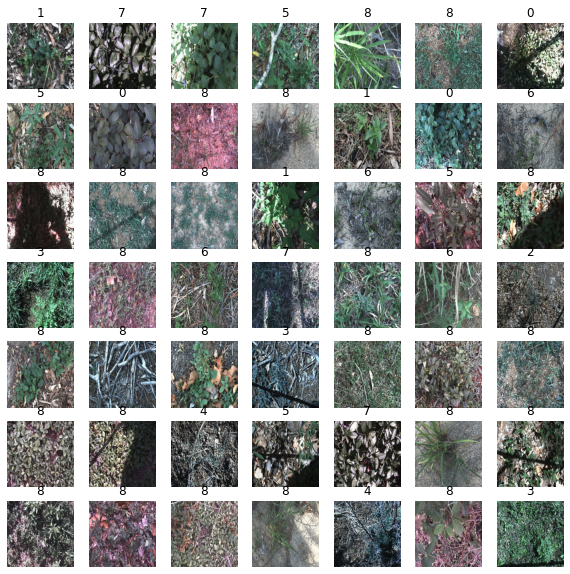

In [ ]:
plt.figure(figsize=(10, 10))


for i, (image, label) in enumerate(train_set[1].take(49)):
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [ ]:
image_size = (256, 256)

print(train_set[0])

for i in range(len(train_set)):
  train_set[i] = train_set[i].map(lambda x, y: (tf.image.resize(x, image_size), y))

print(train_set[0])

print(valid_set[0])
for z in range(len(valid_set)):
  valid_set[z] = valid_set[z].map(lambda x, y: (tf.image.resize(x, image_size), y))

print(valid_set[0])

print(test_set)

test_set = test_set.map(lambda x, y: (tf.image.resize(x, image_size), y))

print(test_set)


<PrefetchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
batch_size = 32



print(train_set[0])
for i in range(len(train_set)):
  train_set[i] = train_set[i].cache().batch(batch_size).prefetch(buffer_size=10)
print(train_set[0])

print(valid_set[0])
for z in range(len(valid_set)):
  valid_set[z] = valid_set[z].cache().batch(batch_size).prefetch(buffer_size=10)
print(valid_set[0])

print(test_set)
test_set = test_set.cache().batch(batch_size).prefetch(buffer_size=10)
print(test_set)


<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
from tensorflow.keras import layers


data_preprocessing = keras.Sequential(
    [
        layers.Resizing(224, 224),
        #layers.Rescaling(1./255)
    ]
)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(1),
        layers.RandomContrast(factor=0.3),
        layers.RandomBrightness(factor=0.15),
        layers.RandomZoom(0.1)
    
    ]
)


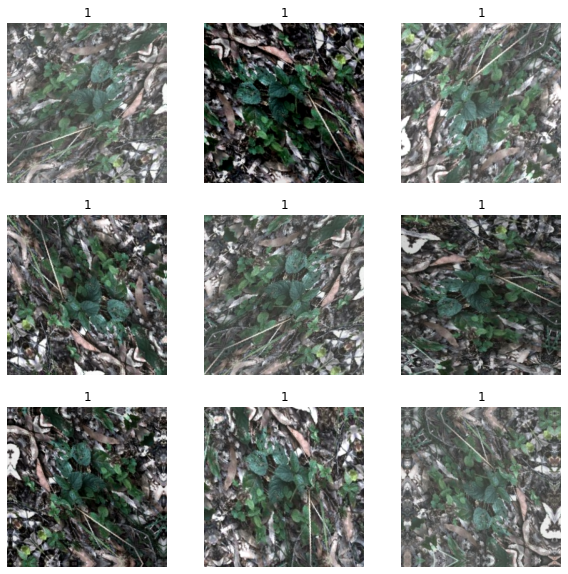

In [ ]:
import numpy as np



for images, labels in train_set[1].take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training=True)
        plt.imshow(augmented_image[0].numpy().astype("int64"))
        plt.title(int(labels[0]))
        plt.axis("off")




In [ ]:
pretrained_model= tf.keras.applications.ResNet50(
      
    include_top=False,
    input_shape=(224,224,3),
    pooling='avg',classes=9,
    weights='imagenet'

    )


pretrained_model.trainable=False

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/20


165/165 [==============================] - 40s 179ms/step - loss: 1.2574 - accuracy: 0.5823 - val_loss: 0.9506 - val_accuracy: 0.6790
Epoch 2/20
165/165 [==============================] - 27s 167ms/step - loss: 0.9170 - accuracy: 0.6695 - val_loss: 0.8479 - val_accuracy: 0.7013
Epoch 3/20
165/165 [==============================] - 27s 166ms/step - loss: 0.8416 - accuracy: 0.7009 - val_loss: 0.8156 - val_accuracy: 0.7207
Epoch 4/20
165/165 [==============================] - 27s 166ms/step - loss: 0.7864 - accuracy: 0.7255 - val_loss: 0.7721 - val_accuracy: 0.7316
Epoch 5/20
165/165 [==============================] - 27s 166ms/step - loss: 0.7643 - accuracy: 0.7282 - val_loss: 0.7527 - val_accuracy: 0.7367
Epoch 6/20
165/165 [==============================] - 27s 166ms/step - loss: 0.7362 - accuracy: 0.7403 - val_loss: 0.7523 - val_accuracy: 0.7441
Epoch 7/20
165/165 [==============================] - 27s 166ms/step - loss: 0.6963 - accuracy: 0.7542 - val_loss: 0.6755 - val_accuracy: 0.7

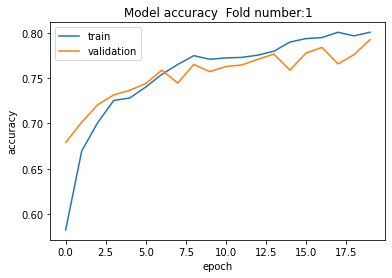

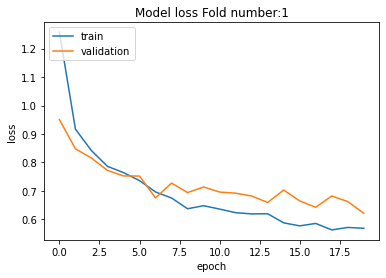

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20


165/165 [==============================] - 36s 175ms/step - loss: 1.2104 - accuracy: 0.6044 - val_loss: 0.8785 - val_accuracy: 0.6956
Epoch 2/20
165/165 [==============================] - 28s 168ms/step - loss: 0.9485 - accuracy: 0.6686 - val_loss: 0.7865 - val_accuracy: 0.7139
Epoch 3/20
165/165 [==============================] - 27s 166ms/step - loss: 0.8352 - accuracy: 0.7049 - val_loss: 0.7725 - val_accuracy: 0.7099
Epoch 4/20
165/165 [==============================] - 27s 166ms/step - loss: 0.7956 - accuracy: 0.7106 - val_loss: 0.7493 - val_accuracy: 0.7322
Epoch 5/20
165/165 [==============================] - 27s 166ms/step - loss: 0.7609 - accuracy: 0.7263 - val_loss: 0.7010 - val_accuracy: 0.7504
Epoch 6/20
165/165 [==============================] - 27s 166ms/step - loss: 0.7414 - accuracy: 0.7373 - val_loss: 0.7370 - val_accuracy: 0.7499
Epoch 7/20
165/165 [==============================] - 28s 167ms/step - loss: 0.7078 - accuracy: 0.7483 - val_loss: 0.7022 - val_accuracy: 0.7

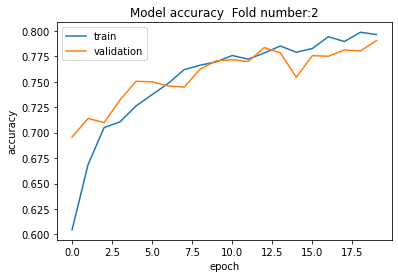

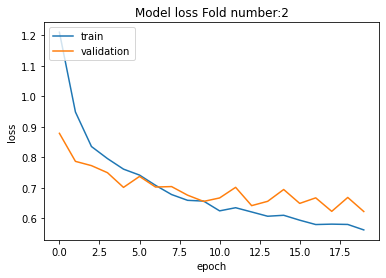

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20


165/165 [==============================] - 36s 177ms/step - loss: 1.2549 - accuracy: 0.5863 - val_loss: 0.9151 - val_accuracy: 0.6533
Epoch 2/20
165/165 [==============================] - 28s 168ms/step - loss: 0.9622 - accuracy: 0.6594 - val_loss: 0.7593 - val_accuracy: 0.7333
Epoch 3/20
165/165 [==============================] - 28s 167ms/step - loss: 0.8666 - accuracy: 0.6908 - val_loss: 0.7537 - val_accuracy: 0.7293
Epoch 4/20
165/165 [==============================] - 28s 170ms/step - loss: 0.7947 - accuracy: 0.7198 - val_loss: 0.7203 - val_accuracy: 0.7464
Epoch 5/20
165/165 [==============================] - 28s 167ms/step - loss: 0.7756 - accuracy: 0.7270 - val_loss: 0.7245 - val_accuracy: 0.7487
Epoch 6/20
165/165 [==============================] - 28s 167ms/step - loss: 0.7354 - accuracy: 0.7339 - val_loss: 0.7756 - val_accuracy: 0.7150
Epoch 7/20
165/165 [==============================] - 28s 167ms/step - loss: 0.7230 - accuracy: 0.7396 - val_loss: 0.6563 - val_accuracy: 0.7

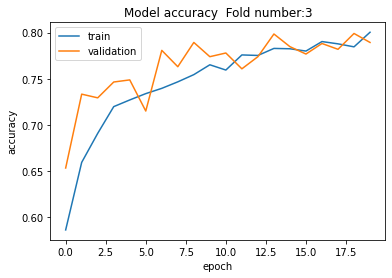

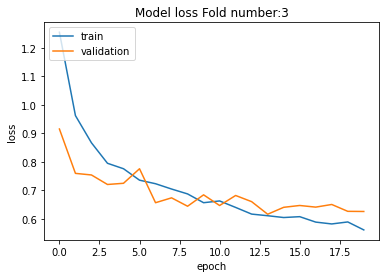

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20


165/165 [==============================] - 36s 180ms/step - loss: 1.2699 - accuracy: 0.5787 - val_loss: 0.9584 - val_accuracy: 0.6630
Epoch 2/20
165/165 [==============================] - 28s 169ms/step - loss: 0.9452 - accuracy: 0.6663 - val_loss: 0.8229 - val_accuracy: 0.6967
Epoch 3/20
165/165 [==============================] - 28s 169ms/step - loss: 0.8422 - accuracy: 0.7057 - val_loss: 0.8266 - val_accuracy: 0.7093
Epoch 4/20
165/165 [==============================] - 28s 168ms/step - loss: 0.7923 - accuracy: 0.7190 - val_loss: 0.8346 - val_accuracy: 0.7047
Epoch 5/20
165/165 [==============================] - 28s 168ms/step - loss: 0.7807 - accuracy: 0.7202 - val_loss: 0.8174 - val_accuracy: 0.7025
Epoch 6/20
165/165 [==============================] - 28s 169ms/step - loss: 0.7414 - accuracy: 0.7360 - val_loss: 0.7379 - val_accuracy: 0.7259
Epoch 7/20
165/165 [==============================] - 28s 169ms/step - loss: 0.7135 - accuracy: 0.7459 - val_loss: 0.7277 - val_accuracy: 0.7

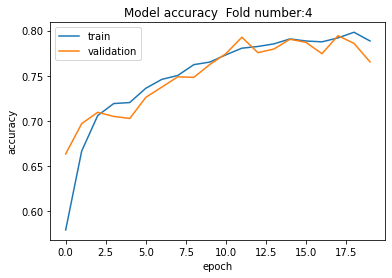

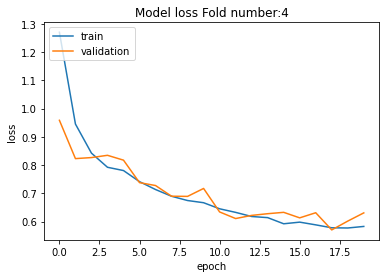

In [ ]:
kfolds = len(train_set) 

accuracy_per_fold = []
loss_per_fold = []

for fold_no in range(kfolds):


  resnet_model = keras.Sequential([

      data_preprocessing,
      data_augmentation,
      pretrained_model,
      layers.Flatten(),
      layers.Dense(512,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(9, activation='softmax')
  ])

  resnet_model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  epochs = 20

  
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = resnet_model.fit(
      train_set[fold_no],
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      validation_data=valid_set[fold_no], 
      )

  # Generate generalization metrics
  scores = resnet_model.evaluate(valid_set[fold_no], verbose=0)
  print(f'Score for fold {fold_no}: {resnet_model.metrics_names[0]} of {scores[0]}; {resnet_model.metrics_names[1]} of {scores[1]*100}%')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy  Fold number:' + str(fold_no+1))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss Fold number:' + str(fold_no+1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(accuracy_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


best_fold = int(accuracy_per_fold.index(max(accuracy_per_fold)))

print("> Fold with best accuracy: " + str(1 + best_fold))

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.6215155720710754 - Accuracy: 79.26899194717407%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.6218249797821045 - Accuracy: 79.04055118560791%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.6255238652229309 - Accuracy: 78.92632484436035%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.6309394836425781 - Accuracy: 76.52769684791565%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 78.4408912062645 (+- 1.1114519105357152)
> Loss: 0.6249509751796722
------------------------------------------------------------------------
> Fold with best accuracy: 1


In [ ]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                

In [ ]:
pretrained_model.trainable=True

pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnet_model.compile(optimizer=Adam(lr=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

resnet_model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50


165/165 [==============================] - 43s 210ms/step - loss: 1.4658 - accuracy: 0.5755 - val_loss: 0.7606 - val_accuracy: 0.7367
Epoch 2/50
165/165 [==============================] - 34s 204ms/step - loss: 0.9108 - accuracy: 0.6941 - val_loss: 0.7885 - val_accuracy: 0.7322
Epoch 3/50
165/165 [==============================] - 33s 203ms/step - loss: 0.7521 - accuracy: 0.7440 - val_loss: 0.7293 - val_accuracy: 0.7533
Epoch 4/50
165/165 [==============================] - 34s 203ms/step - loss: 0.6408 - accuracy: 0.7807 - val_loss: 0.6931 - val_accuracy: 0.7647
Epoch 5/50
165/165 [==============================] - 34s 203ms/step - loss: 0.5813 - accuracy: 0.8049 - val_loss: 0.6575 - val_accuracy: 0.7733
Epoch 6/50
165/165 [==============================] - 33s 203ms/step - loss: 0.5514 - accuracy: 0.8070 - val_loss: 0.6001 - val_accuracy: 0.7944
Epoch 7/50
165/165 [==============================] - 34s 205ms/step - loss: 0.4934 - accuracy: 0.8279 - val_loss: 0.5988 - val_accuracy: 0.8

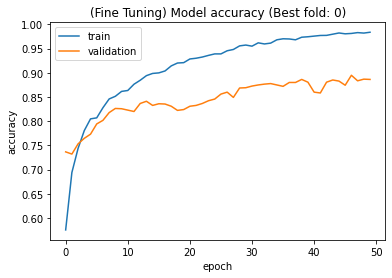

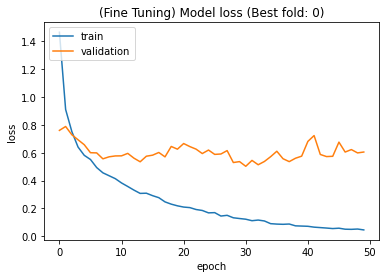

In [ ]:
epochs = 50

# Fit data to model
history2 = resnet_model.fit(
    train_set[best_fold],
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=valid_set[best_fold], 
  )

  
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('(Fine Tuning) Model accuracy (Best fold: ' + str(best_fold) + ")")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('(Fine Tuning) Model loss (Best fold: ' + str(best_fold) + ")")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


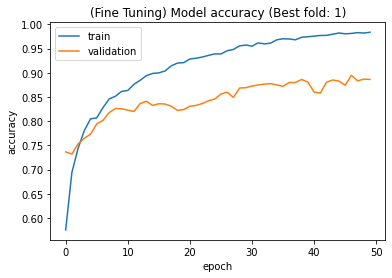

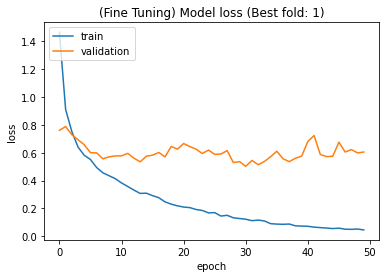

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('(Fine Tuning) Model accuracy (Best fold: ' + str(best_fold +1) + ")")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('(Fine Tuning) Model loss (Best fold: ' + str(best_fold+1) + ")")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = resnet_model.predict(test_set)
predictions=np.argmax(predictions,axis=1)

55/55 [==============================] - 2s 27ms/step


In [ ]:
predictions


array([0, 8, 0, ..., 7, 5, 8])

In [ ]:
# Evaluate the best model with testing data.
print(resnet_model.evaluate(x=test_set))

55/55 [==============================] - 1s 24ms/step - loss: 0.5402 - accuracy: 0.8897
[0.5402085185050964, 0.8897143006324768]


In [ ]:
test_labels=np.array([])
for i in test_set:
  test_labels=np.append(test_labels, i[1].numpy())

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
print("Precision:",metrics.precision_score(test_labels, predictions, average = 'weighted'))
print("Recall:",metrics.recall_score(test_labels, predictions, average = 'weighted'))
print("F1-score:",metrics.f1_score(test_labels, predictions, average = 'weighted'))

Accuracy: 0.8897142857142857
Precision: 0.8901274095033799
Recall: 0.8897142857142857
F1-score: 0.8864231410162803


In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_labels, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  index +=1

print(len(test_labels))
print(len(misclassifiedIndexes))



1750
193


In [ ]:
class_names = ["Chinee apple", "Lantana", "Parkinsonia", "Parthenium", "Prickly acacia", "Rubber vine", "Siam weed", "Snake weed", "Negative"]

for images, labels in test_set.take(1):
  i = 0
  plt.figure(figsize=(10, 10))
  
  for badIndex in misclassifiedIndexes[0:3]:
    ax = plt.subplot(1, 3, i + 1)
    image_to_show = images[badIndex]
    plt.imshow(image_to_show.numpy().astype("int64"))
    plt.title('Predicted: {}, True: {}'.format(class_names[predictions[badIndex].astype(np.int64)], class_names[test_labels[badIndex].astype(np.int64)]), fontsize = 10)
    plt.axis("off")

    i += 1 


NameError: ignored

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
resnet_model.save('DeepWeedsResNet50FineTuning.h5')